# In the series of convolutional neural network this is a classifier that distinguishes between a cat and a dog... 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-09-10 09:09:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.160.240, 172.217.166.208, 172.217.166.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.160.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   238KB/s    in 4m 44s  

2020-09-10 09:14:40 (236 KB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')

train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')

validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=1e-4),
             metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/100
Epoch 1/100
100/100 - 9s - loss: 0.6891 - acc: 0.5385 - val_loss: 0.6899 - val_acc: 0.5150
Epoch 2/100
Epoch 1/100
100/100 - 6s - loss: 0.6585 - acc: 0.6135 - val_loss: 0.6528 - val_acc: 0.6270
Epoch 3/100
Epoch 1/100
100/100 - 7s - loss: 0.6170 - acc: 0.6575 - val_loss: 0.6189 - val_acc: 0.6600
Epoch 4/100
Epoch 1/100
100/100 - 6s - loss: 0.5809 - acc: 0.6905 - val_loss: 0.5833 - val_acc: 0.7060
Epoch 5/100
Epoch 1/100
100/100 - 7s - loss: 0.5523 - acc: 0.7120 - val_loss: 0.5744 - val_acc: 0.6990
Epoch 6/100
Epoch 1/100
100/100 - 7s - loss: 0.5279 - acc: 0.7365 - val_loss: 0.5865 - val_acc: 0.6900
Epoch 7/100
Epoch 1/100
100/100 - 7s - loss: 0.5094 - acc: 0.7500 - val_loss: 0.6180 - val_acc: 0.6790
Epoch 8/100
Epoch 1/100
100/100 - 7s - loss: 0.4818 - acc: 0.7655 - val_loss: 0.5852 - val_acc: 0.7020
Epoch 9/100
Epoch 1/100
100/100 - 7s - loss: 0.4678 - acc: 0.7800 - val_loss: 0.5658 - val_acc: 0.7220
Epoch 10/100
Epoch 1/100
100/100 - 7s - loss: 0.4397 - acc: 0.7905 - val_

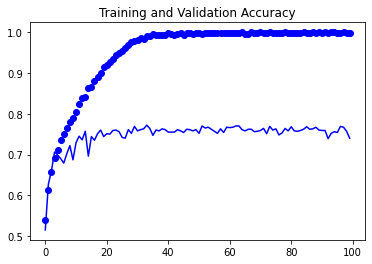

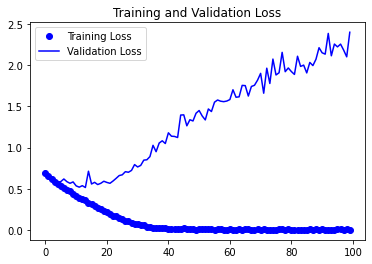

In [14]:
import matplotlib.pyplot as plt 
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,'bo',label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')

plt.title('Training and Validation Accuracy')

plt.figure()

plt.plot(epochs, loss,'bo',label='Training Loss')
plt.plot(epochs, val_loss,'b',label='Validation Loss')

plt.title('Training and Validation Loss')

plt.legend()

plt.show()

